<a href="https://colab.research.google.com/github/ibritics/Python_DataAnalytics_Tutorials/blob/main/Python_Files/Lecture11_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 11: Classification Models Tree Based Models

Importing libraries related to EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from google.colab import userdata

Mounted at /content/drive


In [ ]:
df= pd.read_csv(userdata.get('MP')+'/Data/Default.csv') #Default Database

In [ ]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [ ]:
mapping = {'Yes': 1, 'No': 0}
df['is_student'] = df['student'].map(mapping)
df['default_yes'] = df['default'].map(mapping)

In [ ]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,balance,income,is_student,default_yes
balance,1.000000,-0.152243,0.203578,0.350119
income,-0.152243,1.000000,-0.753985,-0.019871
is_student,0.203578,-0.753985,1.000000,0.035420
default_yes,0.350119,-0.019871,0.035420,1.000000


In [ ]:
X= df[['is_student','balance','income']]
y = df[['default_yes']]

Importing the libraries related to classification


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Tree Model

In [ ]:
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_classifier.fit(X_train, y_train) #Sparing

# Make predictions on the test set
dt_predictions_train = dt_classifier.predict(X_train)
dt_predictions = dt_classifier.predict(X_test) #Real Fight

# Evaluate the accuracy of the decision tree model
dt_accuracy_train = accuracy_score(y_train, dt_predictions_train)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy_train)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 1.0
Decision Tree Accuracy: 0.957


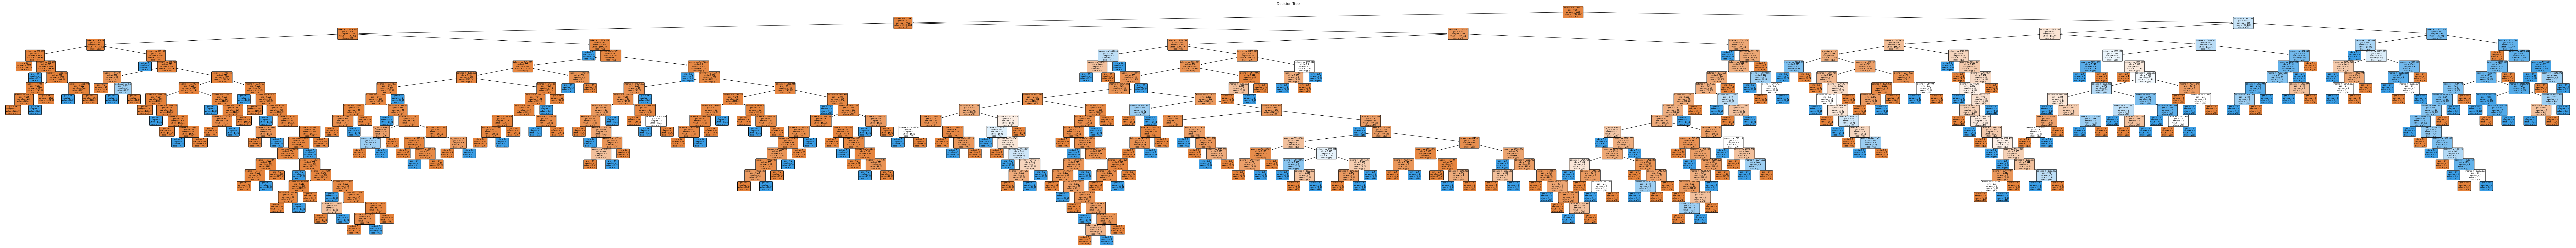

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(160,15))
plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
plt.title("Decision Tree")
plt.show()

## Random Forests:<br>

Ensemble of Trees: Random Forest is an ensemble learning method that builds multiple decision trees and merges their predictions to obtain a more robust and accurate result.
Training: Each tree in the forest is trained on a random subset of the training data (bootstrap sampling) and may only consider a random subset of features at each split.
Reduced Overfitting: By combining the predictions of multiple trees and introducing randomness, Random Forests reduce overfitting compared to individual decision trees.
Improved Generalization: Random Forests tend to generalize better to new, unseen data due to the averaging effect of multiple trees.

In [ ]:
# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42,n_estimators=1000)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the accuracy of the random forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

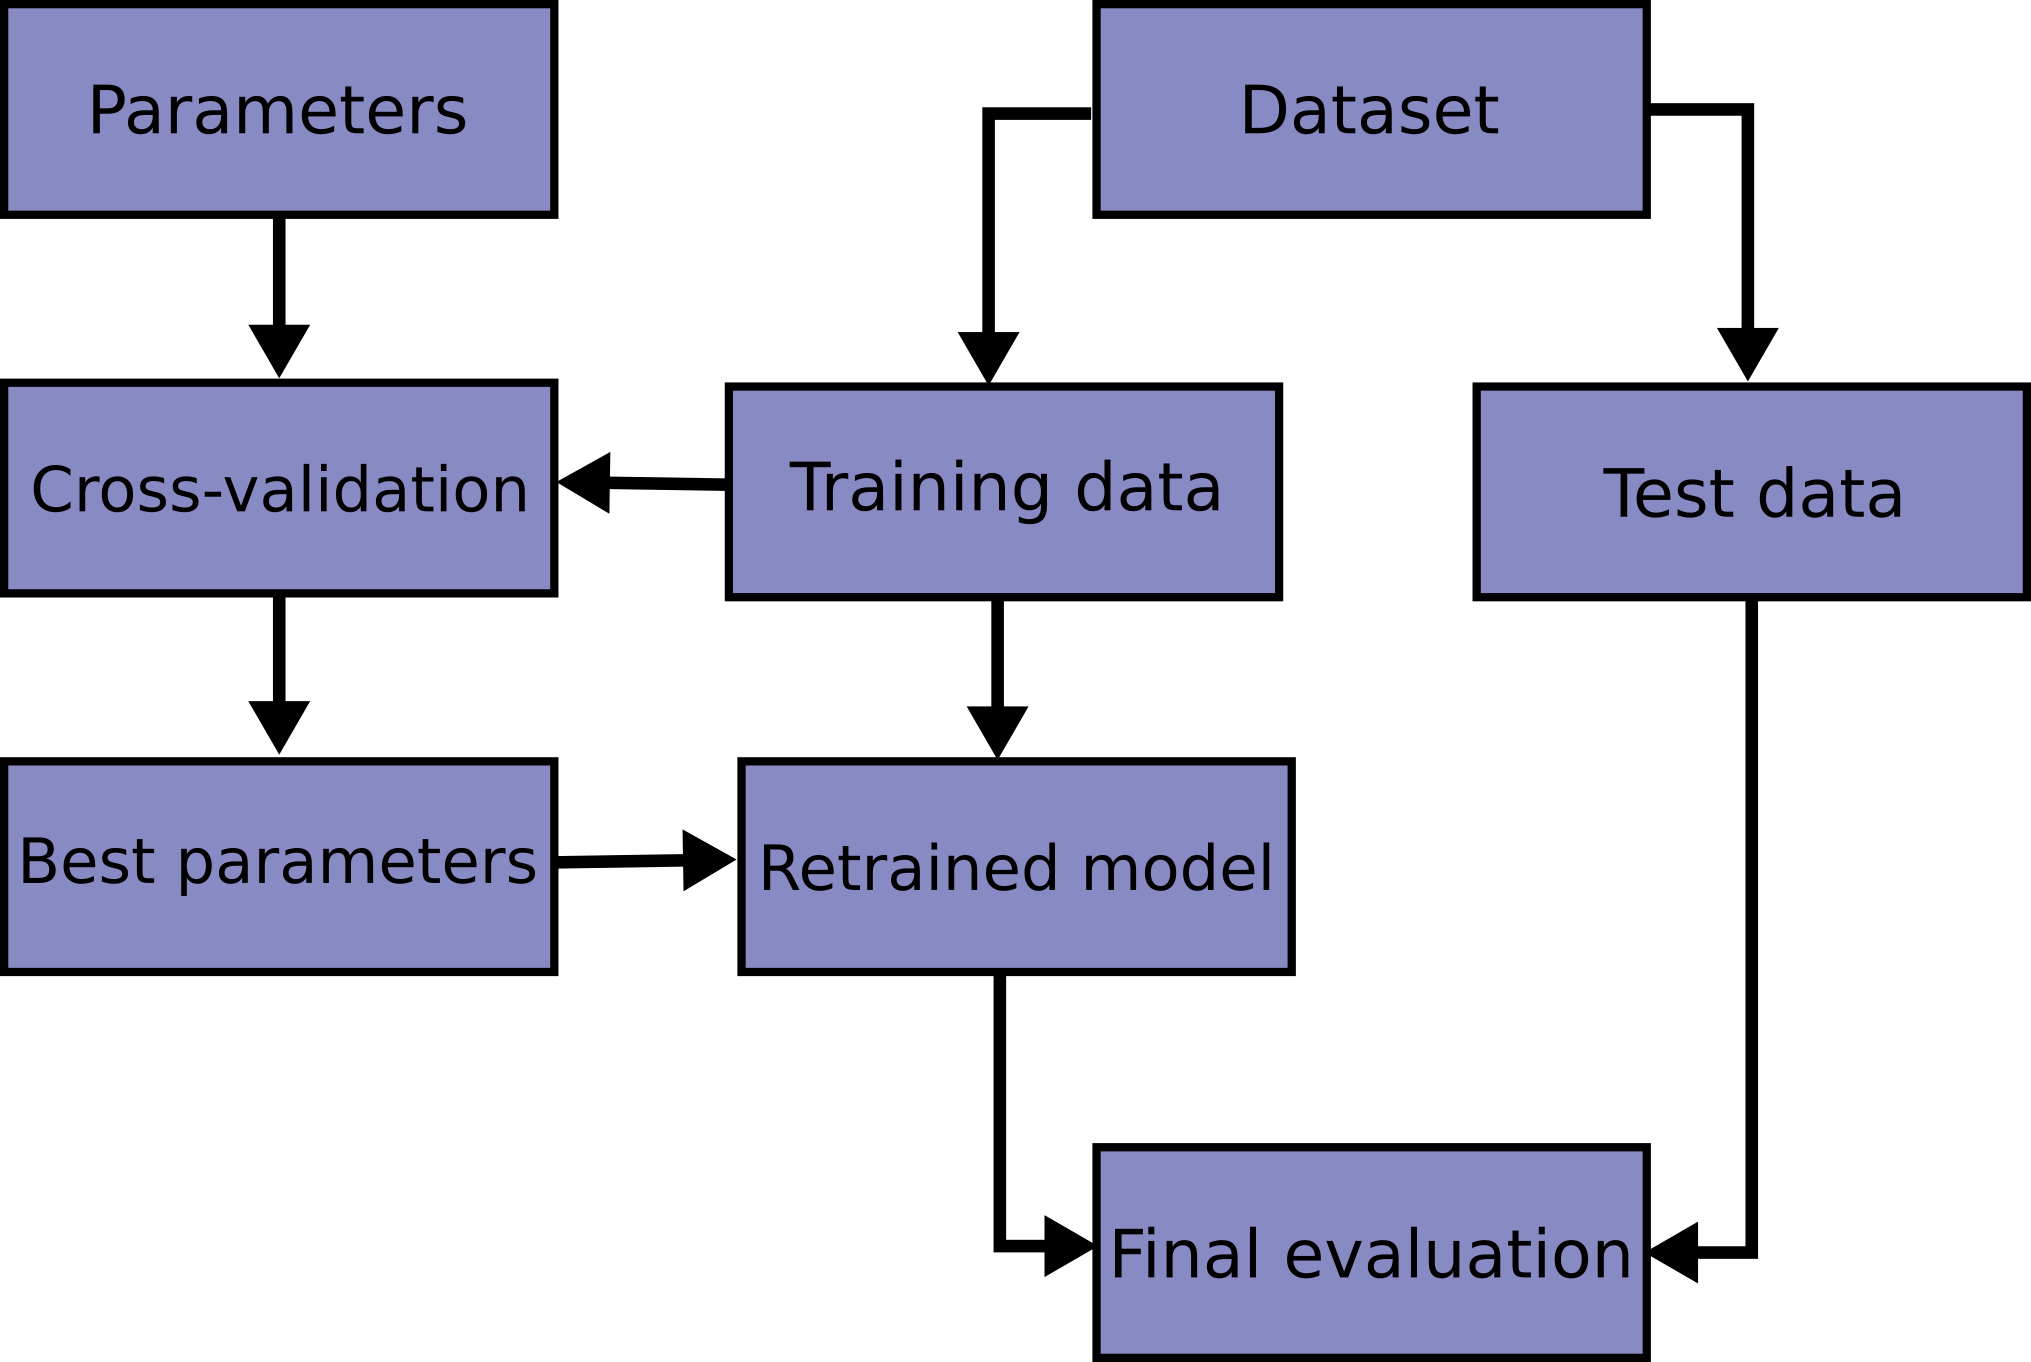




In [ ]:
num_trees_list = [100, 500, 1000]

# Iterate over different number of trees
for num_trees in num_trees_list:
    # Create a random forest classifier with the current number of trees
    rf_classifier = RandomForestClassifier(random_state=42, n_estimators=num_trees)

    # Fit the model to the training data
    rf_classifier.fit(X_train, y_train['default_yes'])

    # Make predictions on the test set
    rf_predictions = rf_classifier.predict(X_test)

    # Evaluate the accuracy of the random forest model
    rf_accuracy = accuracy_score(y_test, rf_predictions)

    # Print the accuracy for the current number of trees
    print(f"Random Forest Accuracy with {num_trees} trees:", rf_accuracy)

### Cross Validation

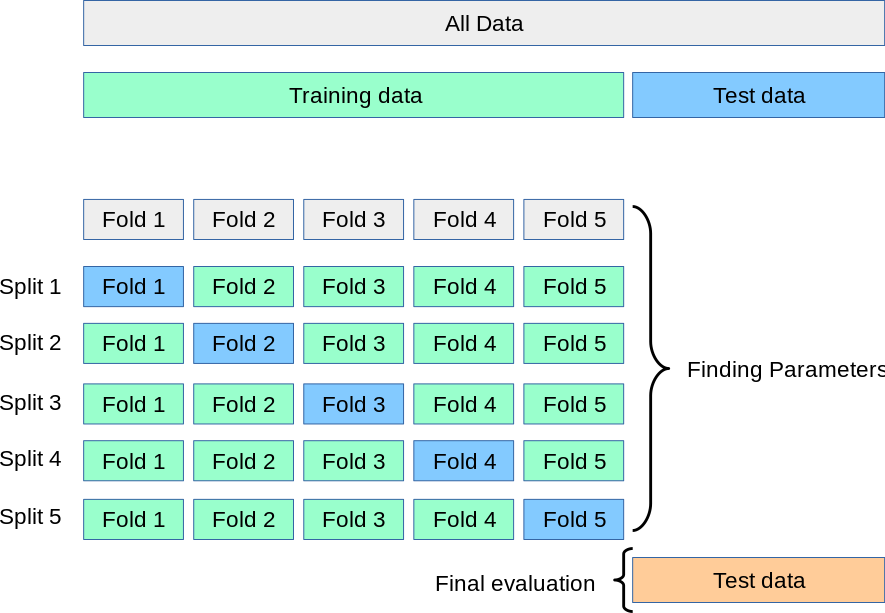

In [ ]:
from sklearn.model_selection import cross_val_score, KFold


With cross validation we take a subset of the training dataset and use it for training. Right after we use it to predict within the training set another subset. However, when the size of the dataset is small it might be a problem

In [ ]:
num_trees_list = [100, 500, 1000]

# Set up K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over different number of trees
for num_trees in num_trees_list:
    # Create a random forest classifier with the current number of trees
    rf_classifier = RandomForestClassifier(random_state=42, n_estimators=num_trees)

    # Perform cross-validation
    cv_scores = cross_val_score(rf_classifier, X_train, y_train['default_yes'], cv=kfold)

    # Print the cross-validated accuracy for the current number of trees
    print(f"Cross-validated Random Forest Accuracy with {num_trees} trees:", np.mean(cv_scores))

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=500)
# Fit the model to the training data
rf_classifier.fit(X_train, y_train['default_yes'])

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the accuracy of the random forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Print the accuracy for the current number of trees
print(f"Random Forest Accuracy with {num_trees} trees:", rf_accuracy)

## Gradient Boosting: <br>

XGBoost is based on the gradient boosting framework, which builds a model in a sequential manner, combining weak learners (typically shallow trees) to create a strong predictive model.
Unlike Random Forests, where trees are built independently, in gradient boosting, each tree corrects the errors of the previous one. <br>

In [ ]:
xgb_classifier = XGBClassifier(random_state=42, max_depth=3, learning_rate= 0.01,n_estimators=500)

# Fit the model to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_classifier.predict(X_test)

# Evaluate the accuracy of the XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)

Iterating through the parameters

In [ ]:
max_depth_list = [3, 5, 7]
learning_rate_list = [0.01, 0.1, 0.2]
n_estimators_list = [100, 500,1000]

# Iterate over different hyperparameter combinations
for max_depth in max_depth_list:
    for learning_rate in learning_rate_list:
        for n_estimators in n_estimators_list:
            # Create an XGBoost classifier with the current hyperparameters
            xgb_classifier = XGBClassifier(random_state=42, max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators)

            # Fit the model to the training data
            xgb_classifier.fit(X_train, y_train)

            # Make predictions on the test set
            xgb_predictions = xgb_classifier.predict(X_test)

            # Evaluate the accuracy of the XGBoost model
            xgb_accuracy = accuracy_score(y_test, xgb_predictions)

            # Print the accuracy and hyperparameters for the current combination
            print(f"XGBoost Accuracy with max_depth={max_depth}, learning_rate={learning_rate}, n_estimators={n_estimators}: {xgb_accuracy}")

Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 300, 500]
}

In [ ]:
xgb_classifier = XGBClassifier(random_state=42)

grid_search = GridSearchCV(xgb_classifier, param_grid,  scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

Best Estimator

In [ ]:
best_xgb_classifier = grid_search.best_estimator_

In [ ]:
# Make predictions on the test set using the best estimator
xgb_predictions = best_xgb_classifier.predict(X_test)

# Evaluate the accuracy of the best XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Print the best hyperparameters and accuracy
print("Best XGBoost Parameters:", grid_search.best_params_)
print("Best XGBoost Accuracy:", xgb_accuracy)

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],  # Maximum depth of a tree, controls overfitting
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage to prevent overfitting
    'n_estimators': [100, 300, 500]  # Number of boosting rounds (trees) in the ensemble
}

xgb_classifier = XGBClassifier(random_state=42)

# Set up K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=kfold, scoring='accuracy') ###Adding on Grid Search a Kfold.

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_xgb_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best estimator
xgb_predictions = best_xgb_classifier.predict(X_test)

# Evaluate the accuracy of the best XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Print the best hyperparameters and accuracy
print("Best XGBoost Parameters:", grid_search.best_params_)
print("Best XGBoost Accuracy:", xgb_accuracy)

## Comparing Results

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have dt_accuracy, rf_accuracy, and xgb_accuracy already calculated

# List of model names
models = ['Decision Tree', 'Random Forest', 'XGBoost']

# List of corresponding accuracies
accuracies = [dt_accuracy, rf_accuracy, xgb_accuracy]

# Plotting the barplot
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim([0, 1])  # Set y-axis limit between 0 and 1 for accuracy
plt.show()

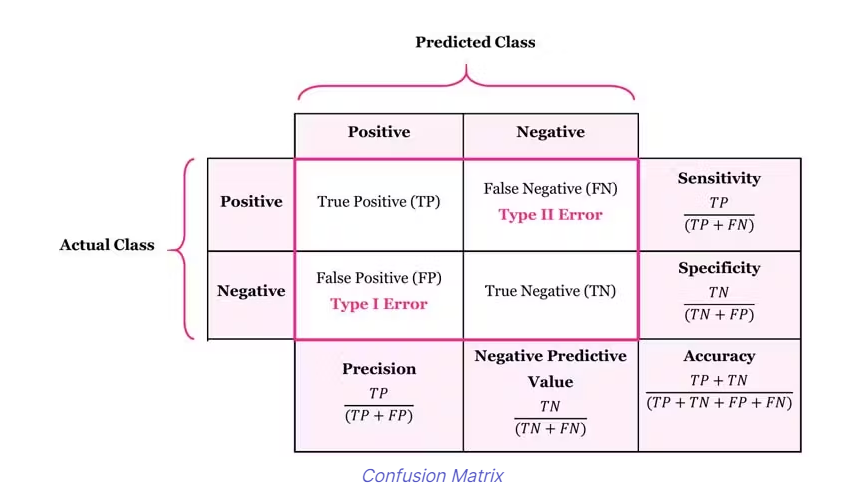

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test, dt_predictions, rf_predictions, xgb_predictions

dt_cm = confusion_matrix(y_test, dt_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
xgb_cm = confusion_matrix(y_test, xgb_predictions)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Decision Tree
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0], cbar=False,
            annot_kws={"size": 14}, linewidths=.5, square=True)
axes[0].set_title('Decision Tree Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Random Forest
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", ax=axes[1], cbar=False,
            annot_kws={"size": 14}, linewidths=.5, square=True)
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# XGBoost
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Blues", ax=axes[2], cbar=False,
            annot_kws={"size": 14}, linewidths=.5, square=True)
axes[2].set_title('XGBoost Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to calculate and print evaluation metrics
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()

# Calculate metrics for each model
calculate_metrics(y_test, dt_predictions, "Decision Tree")
calculate_metrics(y_test, rf_predictions, "Random Forest")
calculate_metrics(y_test, xgb_predictions, "XGBoost")
